# K-Means Clustering

- **Goal**: _Is to identify some pattern within our customers_.
- **How**: _By Creating a dependable variable which will take a finite number of values and each of this value will be a <br>
           Class of the dependent variable_.<br>
- **Note**: _We don't have to split the data into training and test set for K-Means Clustering, because by splitting the data implies we have a <br>
            dependent variable, containing the real result_.

# 1. Importing the libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Importing the Dataset

In [16]:

data_set = pd.read_csv('Mall_Customers.csv')

# Matrix of features:
#                    - The is not a  dependable variable priori when doing clustering, especially K-Means.
#                    - So the Last column of the dataset "spending score" is not a dependable variable but a feature.
#                    - CustomerID has no impact on the clustering, so it can be excluded.
#                    - For teaching purpose and visualization purposes we're going to keep Annual Income and Spending Score.
# X = data_set.iloc[:, :].values  # Meaning we want to get the values of all the rows and columns index.
# In order to select only the annual income and the spending score:(we do this only for visualization/plotting purposes)
X = data_set.iloc[:, [3, 4]].values

# The is no dependable Variable Y apriori i.e. we don't need dependable variables Y in clustering.

# 3. Elbow Method
- We use the Elbow method to find the optimal number of clusters.
- The Implementation of the Elbow Method is done with a class in Scikit Learn called KMeans
  - And by running the KMeans model several times and each time with a different numbers of clusters

In [17]:
# 1. Importing the KMeans Class
from sklearn.cluster import KMeans

# 2. Creating an empty List to store the WCSS values at each iteration.
wcss = [] 

# 3. Implementing a For-Loop which will run the KMeans with 10 different clusters and Compute the WCSS each time we run a loop.
for i in range(1, 11):            # up to 11 because the range or limit is always exclude. i.e will run until 10.
    # Creating KMeans object which represent the KMeans algorithm.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)      # n_cluster stand for number of clusters.
                                                                                # initialize the KMeans algorithm with the KMeans++ to avoid random initialization trap.
                                                                                # random_state is a seed value, which is used to initialize the random number generator.

# 4. Training the KMeans algorithm on the dataset by using the fit method.
    kmeans.fit(X)        # Training the KMeans algorithm on the X features.

# 5. Append/Add the WCSS value at each iteration to the wcss list.
    wcss.append(kmeans.inertia_)    # Append the WCSS value at each iteration to the wcss list.
                                    # Inertia is the sum of squared distances of samples to their closest cluster center.
                                        # Calling the inertia_ attribute on the KMeans object will return the value of the WCSS.


# 4. Plotting the WCSS values against the number of clusters

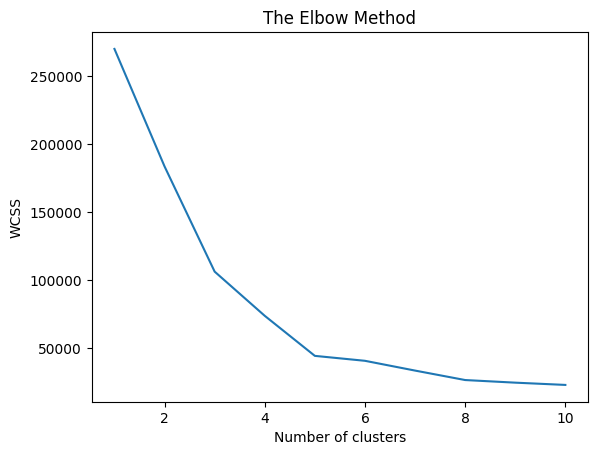

In [18]:
# Plotting the WCSS values against the number of clusters.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The optimal number of clusters is the number at which the WCSS value start slowing down.<br>
- In our case, we can see that the optimal number of clusters is 5 because from 5 the WCSS value start becoming flat i.e start<br>
  decreasing slowly.
- We will choose 5 in the next step to build, train and run our model.

# 5 Training the K-Means model on the dataset

In [19]:
# Coping the 2 lines of code above and pasting it here and chang i by 5
# we will still use the k-means++ to avoid the random initialization trap.
# We will also use the inertia_ attribute to get the WCSS value.
# and also keep the random state to be 42.

# 1. Creating KMeans object which represent the KMeans algorithm.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)          # n_cluster stand for number of clusters.
                                                                                # initialize the KMeans algorithm with the KMeans++ to avoid random initialization trap.
                                                                                # random_state is a seed value, which is used to initialize the random number generator.

# 2 Training the KMeans algorithm on the dataset by using the fit method.
Y_kmeans = kmeans.fit_predict(X)         # fit_predict not only trains the models on the dataset but return exactly the dependable variable Y.
                                         # with 5 values taken by the dependable variable Y corresponding to the 5 clusters with each customer grouped by similarity.


In [20]:
print(Y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# 6. Visualizing the clusters

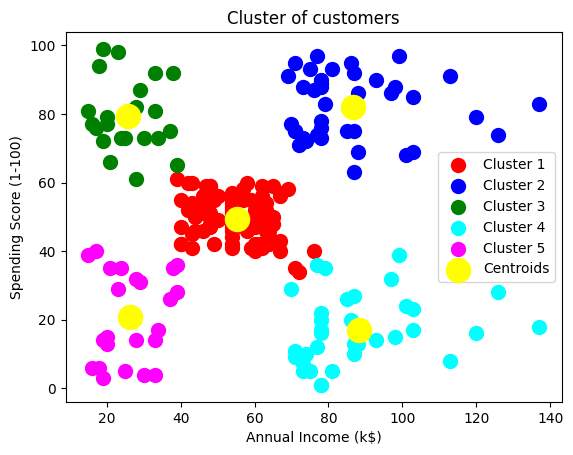

In [21]:
# 1. creating Scatter plots for each of the cluster.
    # - Here we will specify the x and y coordinate of the points, size, color(to distinguish the clusters) and label.
    #                  X                    Y     coordinate
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
        # For X coordinate:
              # Start by Calling the feature X since it contains the different customers.
              # index of the column after the comma and before the column all the customer that belongs to that cluster, by using the Y_kmeans to specify it...
              # ... i.e. Y_kmeans will select all the customers that belongs to that particular cluster.
              # i.e column of x coordinate correspond to the annual income and .
        
        # For Y coordinate:
              # Start by Calling the feature X since it contains the different customers.
              # index of the column after the comma and before the column all the customer that belongs to that cluster, by using the Y_kmeans to specify it...
              # ... i.e. Y_kmeans will select all the customers that belongs to that particular cluster.
              # For the column of y coordinate we call the index 1 since it correspond to the spending score.

        # i.e column of x coordinate correspond to the annual income and column of y coordinate correspond to the spending score.

plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# 2. Plotting the centroids of each of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')     
                                                                         # cluster_centers_ method is a 2D array in which the row correspond to the centroids..
                                                                         # ... and the column correspond to their coordinate. ...
                                                                         # ... For the row we're going to take everything and for the column since we're dealing ..
                                                                         # ... with the X coordinate we will just take the first column which correspond to ...
                                                                         # ... the index 0.
                                                                         # For the Y coordinate we will take the second column which correspond to index 1.

plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


- from the above plot the customers in green and blue will be targeted by the marketing team when the will be new promotion
  simply because they spend a lot and they will be a high chances that they will buy the new product.
- For customer earning high and spending less we should give them a discount or send them some lucrative offers.
  
### Goal: 
- identifying different clusters of customers and we apply on them different marketing strategies.